In [1]:
import requests
from IPython.core.display import HTML
styles = requests.get('https://raw.githubusercontent.com/Harvard=IACS/2018-CS109A/master/content/styles/cs109.css').text
HTML(styles)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

%matplotlib inline

from PIL import Image

In [3]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

tf.keras.backend.clear_session()

print(tf.__version__)

2022-03-13 19:34:55.702030: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-13 19:34:55.702060: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.8.0


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])



2022-03-13 19:36:22.153320: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-13 19:36:22.153354: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-13 19:36:22.153368: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-7J378E6): /proc/driver/nvidia/version does not exist
2022-03-13 19:36:22.154099: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


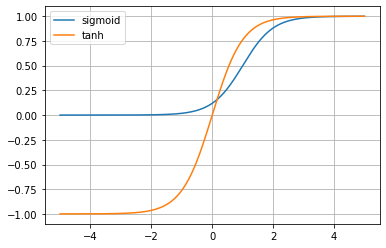

In [6]:
def sigmoid(x,c,a):
    z = ((x-c)/a)
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-5.0,5.0,500)
c = 1.
a = 0.5
plt.plot(x,sigmoid(x,c,a),label="sigmoid")
plt.plot(x,np.tanh(x),label="tanh")
plt.grid()
plt.legend()

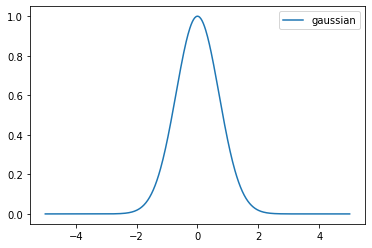

In [7]:
x = np.linspace(-5.0,5.0,500)
def gaussian(x):
    return np.exp(-x**2)

f = gaussian(x)
plt.plot(x,f,label="gaussian")
plt.legend()

In [8]:
def affine(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

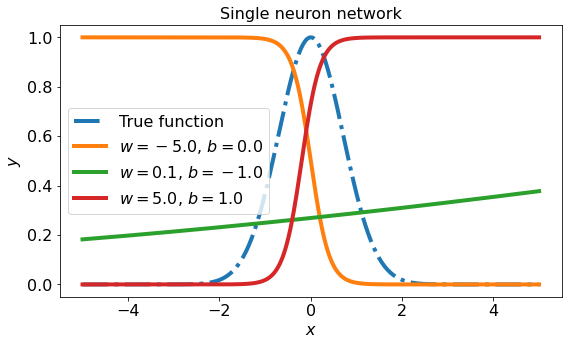

In [9]:
w = [-5.0, 0.1, 5.0]
b = [0.0, -1.0, 1.0]

fig, ax = plt.subplots(1,1,figsize=(9,5))
SIZE = 16

ax.plot(x,f, lw=4, ls='-.', label='True function')

for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {0}$, $b = {1}$'.format(wi, bi))

ax.set_title('Single neuron network', fontsize=SIZE)

ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)

ax.legend(loc='best', fontsize=SIZE)

In [10]:
x = np.linspace(-5.0,5.0,500)
f = np.exp(-x**2)

w = np.array([3.5, -3.5])
b = np.array([3.5, 3.5])

z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

h1 = sigmoid(z1)
h2 = sigmoid(z2)

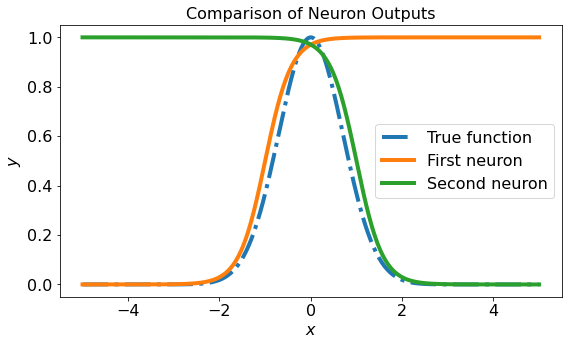

In [11]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

ax.plot(x,f, lw=4, ls='-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)

ax.legend(loc='best', fontsize=SIZE)

In [12]:
wout = np.ones(2)
bout = -1
yout = wout[0] * h1 + wout[1] * h2 + bout

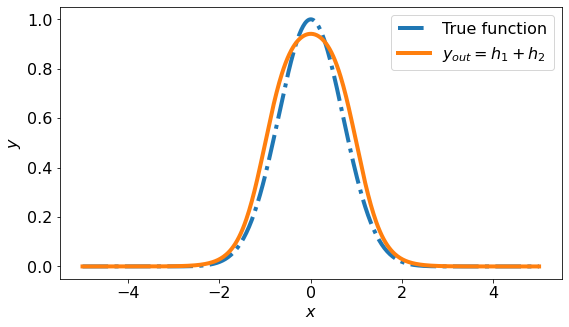

In [13]:
fig, ax = plt.subplots(1,1,figsize=(9,5))

ax.plot(x, f, lw=4, ls='-.', label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

ax.set_xlabel('$x$', fontsize=SIZE)
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE)

ax.legend(loc='best', fontsize=SIZE)

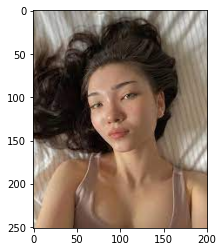

In [21]:
FILE = './fig/aya_shalkar.png'
img = mpimg.imread(FILE)
imgplot = plt.imshow(img)

In [22]:
print(f'The image is a: {type(img)} of shape {img.shape}')
img[3:5, 3:5, :]

The image is a: <class 'numpy.ndarray'> of shape (251, 201, 3)


array([[[0.654902  , 0.6392157 , 0.6039216 ],
        [0.7019608 , 0.68235296, 0.65882355]],

       [[0.64705884, 0.6313726 , 0.59607846],
        [0.69411767, 0.6745098 , 0.6509804 ]]], dtype=float32)

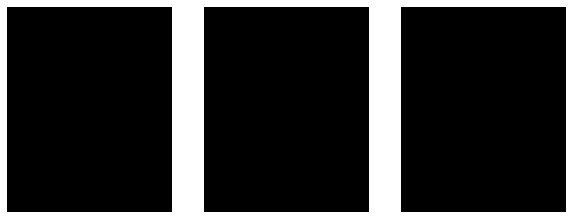

In [23]:
fig, axes = plt.subplots(1,3,figsize=(10,10))

for i, subplot in zip(range(3), axes):
    temp = np.zeros(img.shape, dtype='uint8')
    temp[:,:,i] = img[:,:,i]
    subplot.imshow(temp)
    subplot.set_axis_off()

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


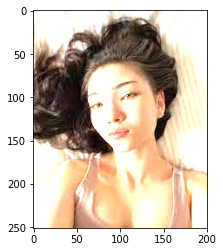

In [24]:
temp = img
temp = temp * 2
plt.imshow(temp)

In [25]:
seed = 7
np.random.seed(seed)

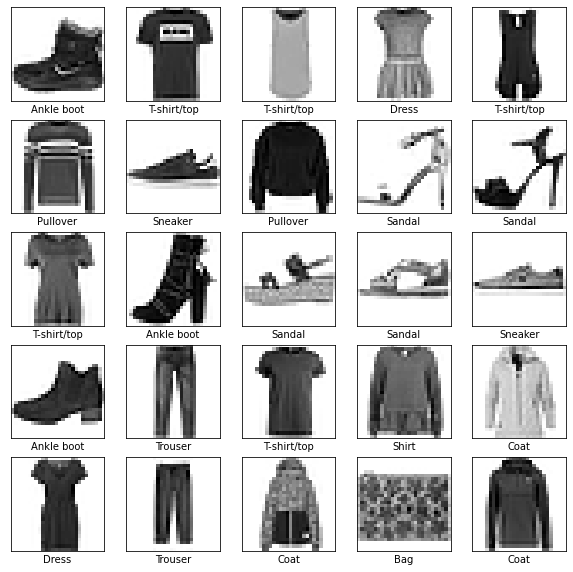

In [27]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

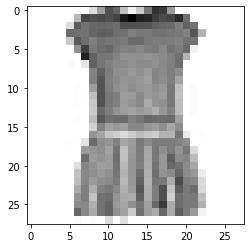

In [28]:
plt.imshow(x_train[3], cmap=plt.cm.binary)

In [29]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [30]:
y_train.shape

(60000,)

In [31]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(154, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [32]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 154)               120890    
                                                                 
 dense_3 (Dense)             (None, 64)                9920      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 131,460
Trainable params: 131,460
Non-trainable params: 0
_________________________________________________________________


In [40]:
tf.keras.utils.plot_model(
    model, 
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96
    )

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [47]:
history = model.fit(x_train, y_train, validation_split=0.33, epochs=50, verbose=2)

Epoch 1/50
1257/1257 - 2s - loss: 0.2237 - accuracy: 0.9167 - val_loss: 0.2251 - val_accuracy: 0.9125 - 2s/epoch - 2ms/step
Epoch 2/50
1257/1257 - 2s - loss: 0.2144 - accuracy: 0.9197 - val_loss: 0.2208 - val_accuracy: 0.9172 - 2s/epoch - 2ms/step
Epoch 3/50
1257/1257 - 2s - loss: 0.2037 - accuracy: 0.9214 - val_loss: 0.2170 - val_accuracy: 0.9191 - 2s/epoch - 2ms/step
Epoch 4/50
1257/1257 - 2s - loss: 0.1966 - accuracy: 0.9244 - val_loss: 0.2284 - val_accuracy: 0.9173 - 2s/epoch - 2ms/step
Epoch 5/50
1257/1257 - 2s - loss: 0.1887 - accuracy: 0.9276 - val_loss: 0.2498 - val_accuracy: 0.9101 - 2s/epoch - 2ms/step
Epoch 6/50
1257/1257 - 2s - loss: 0.1840 - accuracy: 0.9285 - val_loss: 0.2478 - val_accuracy: 0.9126 - 2s/epoch - 2ms/step
Epoch 7/50
1257/1257 - 2s - loss: 0.1765 - accuracy: 0.9320 - val_loss: 0.2555 - val_accuracy: 0.9034 - 2s/epoch - 2ms/step
Epoch 8/50
1257/1257 - 2s - loss: 0.1720 - accuracy: 0.9340 - val_loss: 0.2342 - val_accuracy: 0.9161 - 2s/epoch - 2ms/step
Epoch 9/

In [48]:
model.save('fashion_mnist_model.h5')

In [49]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 0s 794us/step - loss: 0.6964 - accuracy: 0.8877
Test accuracy: 0.8877000212669373


In [50]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


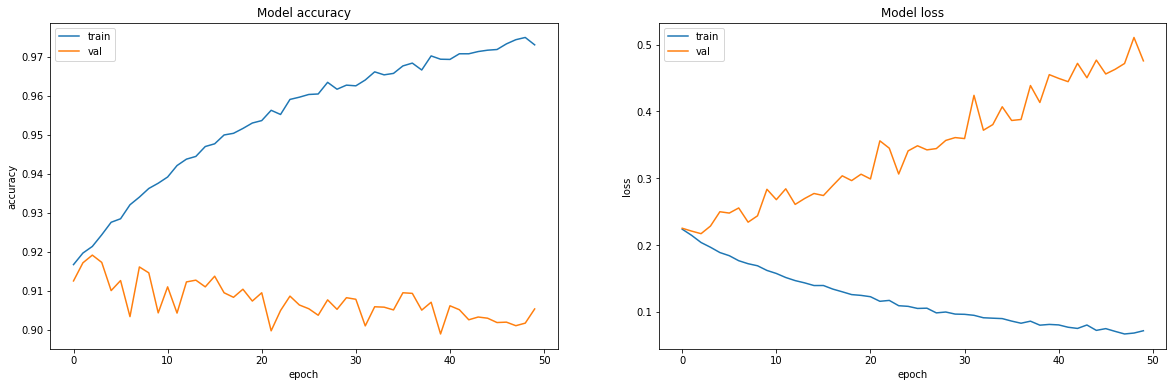

In [52]:
fig, ax = plt.subplots(1,2,figsize=(20,6))

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])

ax[0].set_title('Model accuracy')

ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'val'], loc='best')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'val'], loc='best')

In [53]:
predictions = model.predict(x_test)

In [54]:
predictions[0]

array([3.7452610e-12, 3.9369892e-12, 7.0992897e-16, 2.3500933e-13,
       4.6070681e-15, 1.4730984e-10, 2.9804925e-19, 7.2793656e-09,
       2.0705897e-10, 1.0000000e+00], dtype=float32)

In [57]:
np.argmax(predictions[0]), class_names[np.argmax(predictions[0])]

(9, 'Ankle boot')

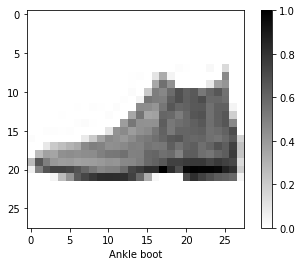

In [58]:
plt.figure()
plt.imshow(x_test[0], cmap=plt.cm.binary)
plt.xlabel(class_names[y_test[0]])
plt.colorbar()


In [71]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)

    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)

    plt.xticks(range(10))
    plt.yticks([])

    thisplot = plt.bar(range(10), predictions_array, color="#777777")

    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    

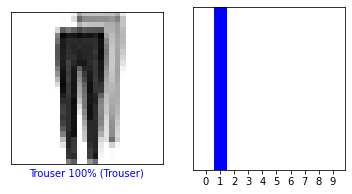

In [72]:
i = 409
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()